In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from module import *

In [2]:
df_llama3 = pd.read_csv("test1_llama3_mxbai_large.csv")
df_mistral = pd.read_csv("test1_mistral_mxbai_large.csv")
df_phi3 = pd.read_csv("test1_phi3_mxbai_large.csv")
df_gemma = pd.read_csv("test1_gemma_mxbai_large.csv")
df_llama3.head(12)

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall
0,Quins drets lingüístics reconeix la Constituci...,La Constitució Espanyola reconeix el castellà ...,"[""1. Els estrangers gaudiran a Espanya de les ...",La Constitució Espanyola reconeix el castellà ...,1.000000,0.706658,1.000000,1.0
1,Què estableix la Constitució Espanyola sobre l...,La Constitució Espanyola estableix que la dete...,"[""artístic dels pobles d'Espanya i dels béns q...",La Constitució Espanyola estableix que la dete...,0.000000,0.755192,0.583333,1.0
2,Quins són els valors superiors de l'ordenament...,"Segons la Constitució Espanyola, els valors su...","[""Títol Preliminar \n \nArticle 1 \n1. Espanya...","Segons la Constitució Espanyola, els valors su...",1.000000,0.797299,1.000000,1.0
3,Quines condicions específiques es poden aplica...,En un contracte indefinit per a persones amb d...,['3\nMOD CIND CAT 05_2024Que\tel\tCONTRACTE \...,En un contracte indefinit per a persones amb d...,0.666667,0.691870,1.000000,1.0
4,Com es defineix i s'estableix la durada del pe...,La durada del període de prova en un contracte...,['CUARTA: La duración del presente contrato s...,La durada del període de prova en un contracte...,0.000000,0.656797,0.583333,1.0
5,Quins drets de bonificació a la Seguretat Soci...,Per als contractes indefinits celebrats amb tr...,['MINISTERIO\nDE EMPLEO Y\nSEGURIDAD SOCIAL\nS...,Per als contractes indefinits celebrats amb tr...,0.500000,0.611926,1.000000,1.0
6,What were Accenture's total revenues and opera...,Accenture's total revenues for the fourth quar...,['relació amb el seu producte interior brut. L...,Accenture's total revenues for the fourth quar...,0.000000,0.922883,0.000000,0.0
7,What were the new bookings for Accenture in th...,New bookings for Accenture in the fourth quart...,['euros/mes\t \t 525\n\t\neuros/mes\nEn\n\t\ne...,New bookings for Accenture in the fourth quart...,0.000000,0.956804,0.000000,0.5
8,What revenue trends were observed in Accenture...,"During the fourth quarter of fiscal 2023, reve...",['...............................................,"During the fourth quarter of fiscal 2023, reve...",0.000000,0.725703,0.000000,0.0
9,What changes occurred in NTT Data's total asse...,"Between March 31, 2024, and June 30, 2024, NTT...",['2\nMOD CIND CAT 05_2024(5)\t El\ttreball\ta...,"Between March 31, 2024, and June 30, 2024, NTT...",0.000000,0.963268,0.000000,0.0


In [3]:
nan_counts_llama3 = df_llama3.isna().sum().sum()
nan_counts_mistral = df_mistral.isna().sum().sum()
nan_counts_phi3 = df_phi3.isna().sum().sum()
nan_counts_gemma = df_gemma.isna().sum().sum()

print("Number of NaN values in llama3: ", nan_counts_llama3)
print("Number of NaN values in mistral: ", nan_counts_mistral)
print("Number of NaN values in phi3: ", nan_counts_phi3)
print("Number of NaN values in gemma: ", nan_counts_gemma)

Number of NaN values in llama3:  0
Number of NaN values in mistral:  2
Number of NaN values in phi3:  55
Number of NaN values in gemma:  11


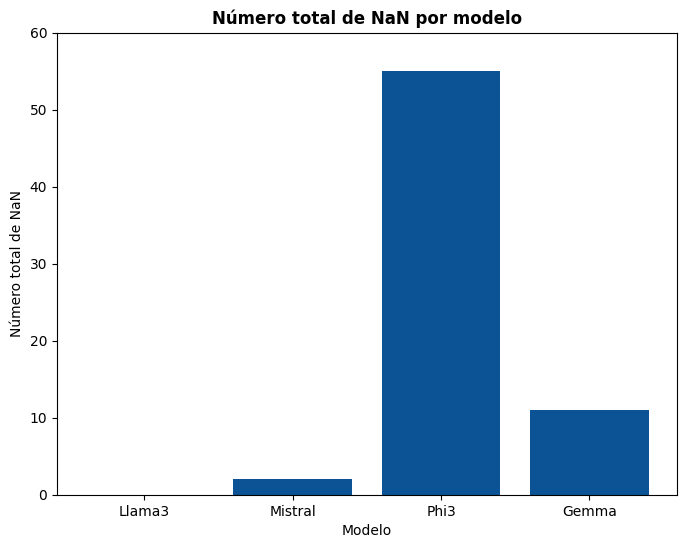

In [4]:
# Crear un diccionario con los nombres de los modelos y los conteos de NaN
nan_counts = {
    "Llama3": nan_counts_llama3,
    "Mistral": nan_counts_mistral,
    "Phi3": nan_counts_phi3,
    "Gemma": nan_counts_gemma
}

# Convertir el diccionario a un DataFrame para facilitar el graficado
df_nan_counts = pd.DataFrame(list(nan_counts.items()), columns=["Model", "NaN Count"])

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(df_nan_counts["Model"], df_nan_counts["NaN Count"], color="#0b5394")

# Configurar etiquetas y título
plt.xlabel("Modelo")
plt.ylabel("Número total de NaN")
plt.title("Número total de NaN por modelo", fontweight="bold")
plt.ylim(0, df_nan_counts["NaN Count"].max() + 5)  # Añadir un poco de espacio en la parte superior

# Guardar el gráfico en un archivo
plt.savefig("nan_counts.png")

# Mostrar el gráfico
plt.show()

In [5]:
df_llama3 = df_llama3.fillna(0, inplace=False)
df_mistral = df_mistral.fillna(0, inplace=False)
df_phi3 = df_phi3.fillna(0, inplace=False)
df_gemma = df_gemma.fillna(0, inplace=False)

In [6]:
df_llama3_cat = df_llama3.iloc[:6]
df_llama3_en = df_llama3.iloc[6:12]
df_llama3_es = df_llama3.iloc[12:]

df_mistral_cat = df_mistral.iloc[:6]
df_mistral_en = df_mistral.iloc[6:12]
df_mistral_es = df_mistral.iloc[12:]

df_phi3_cat = df_phi3.iloc[:6]
df_phi3_en = df_phi3.iloc[6:12]
df_phi3_es = df_phi3.iloc[12:]

df_gemma_cat = df_gemma.iloc[:6]
df_gemma_en = df_gemma.iloc[6:12]
df_gemma_es = df_gemma.iloc[12:]
df_llama3_cat

,question,answer,contexts,ground_truth,faithfulness,answer_relevancy,context_precision,context_recall
0,Quins drets lingüístics reconeix la Constituci...,La Constitució Espanyola reconeix el castellà ...,"[""1. Els estrangers gaudiran a Espanya de les ...",La Constitució Espanyola reconeix el castellà ...,1.000000,0.706658,1.000000,1.0
1,Què estableix la Constitució Espanyola sobre l...,La Constitució Espanyola estableix que la dete...,"[""artístic dels pobles d'Espanya i dels béns q...",La Constitució Espanyola estableix que la dete...,0.000000,0.755192,0.583333,1.0
2,Quins són els valors superiors de l'ordenament...,"Segons la Constitució Espanyola, els valors su...","[""Títol Preliminar \n \nArticle 1 \n1. Espanya...","Segons la Constitució Espanyola, els valors su...",1.000000,0.797299,1.000000,1.0
3,Quines condicions específiques es poden aplica...,En un contracte indefinit per a persones amb d...,['3\nMOD CIND CAT 05_2024Que\tel\tCONTRACTE \...,En un contracte indefinit per a persones amb d...,0.666667,0.691870,1.000000,1.0
4,Com es defineix i s'estableix la durada del pe...,La durada del període de prova en un contracte...,['CUARTA: La duración del presente contrato s...,La durada del període de prova en un contracte...,0.000000,0.656797,0.583333,1.0
5,Quins drets de bonificació a la Seguretat Soci...,Per als contractes indefinits celebrats amb tr...,['MINISTERIO\nDE EMPLEO Y\nSEGURIDAD SOCIAL\nS...,Per als contractes indefinits celebrats amb tr...,0.500000,0.611926,1.000000,1.0


In [7]:
df_llama3_cat_gen = df_llama3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_en_gen = df_llama3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_es_gen = df_llama3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_mistral_cat_gen = df_mistral_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_mistral_en_gen = df_mistral_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_mistral_es_gen = df_mistral_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_phi3_cat_gen = df_phi3_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_phi3_en_gen = df_phi3_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_phi3_es_gen = df_phi3_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])

df_gemma_cat_gen = df_gemma_cat.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_gemma_en_gen = df_gemma_en.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_gemma_es_gen = df_gemma_es.drop(columns=["question", "answer", "contexts", "ground_truth", "context_precision", "context_recall"])
df_llama3_cat_gen

,faithfulness,answer_relevancy
0,1.000000,0.706658
1,0.000000,0.755192
2,1.000000,0.797299
3,0.666667,0.691870
4,0.000000,0.656797
5,0.500000,0.611926


In [8]:
df_llama3_cat_mean = df_llama3_cat_gen.mean()
df_llama3_en_mean = df_llama3_en_gen.mean()
df_llama3_es_mean = df_llama3_es_gen.mean()

df_mistral_cat_mean = df_mistral_cat_gen.mean()
df_mistral_en_mean = df_mistral_en_gen.mean()
df_mistral_es_mean = df_mistral_es_gen.mean()

df_phi3_cat_mean = df_phi3_cat_gen.mean()
df_phi3_en_mean = df_phi3_en_gen.mean()
df_phi3_es_mean = df_phi3_es_gen.mean()

df_gemma_cat_mean = df_gemma_cat_gen.mean()
df_gemma_en_mean = df_gemma_en_gen.mean()
df_gemma_es_mean = df_gemma_es_gen.mean()
df_llama3_cat_mean

faithfulness        0.527778
answer_relevancy    0.703290
dtype: float64

In [9]:
df_llama3_means = get_df(df_llama3_cat_mean, df_llama3_en_mean, df_llama3_es_mean)
df_mistral_means = get_df(df_mistral_cat_mean, df_mistral_en_mean, df_mistral_es_mean)
df_phi3_means = get_df(df_phi3_cat_mean, df_phi3_en_mean, df_phi3_es_mean)
df_gemma_means = get_df(df_gemma_cat_mean, df_gemma_en_mean, df_gemma_es_mean)
df_llama3_means

Idioma,Catalán,Inglés,Español
Faithfulness,0.527778,0.000000,0.000000
Answer Relevancy,0.703290,0.902207,0.794167


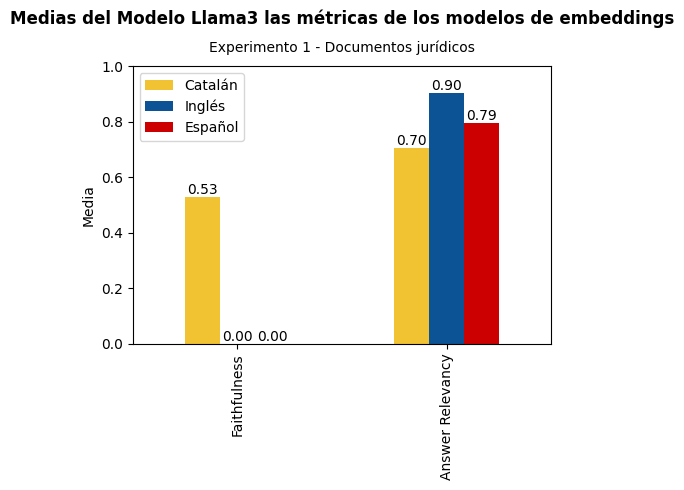

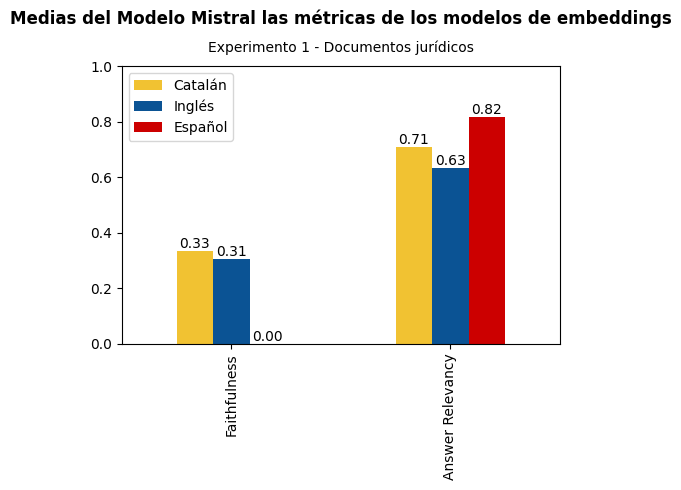

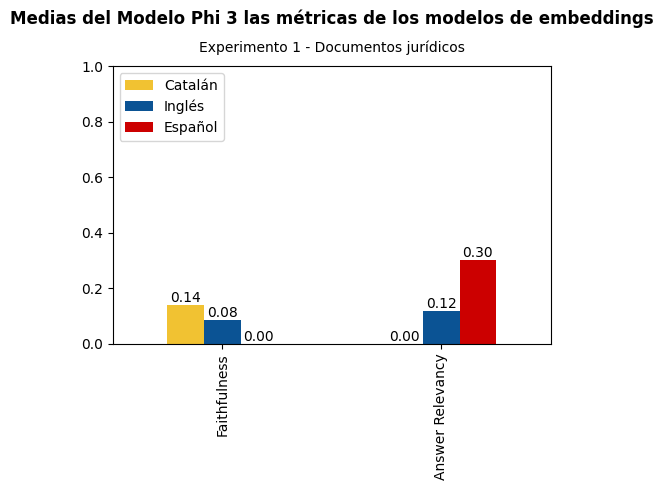

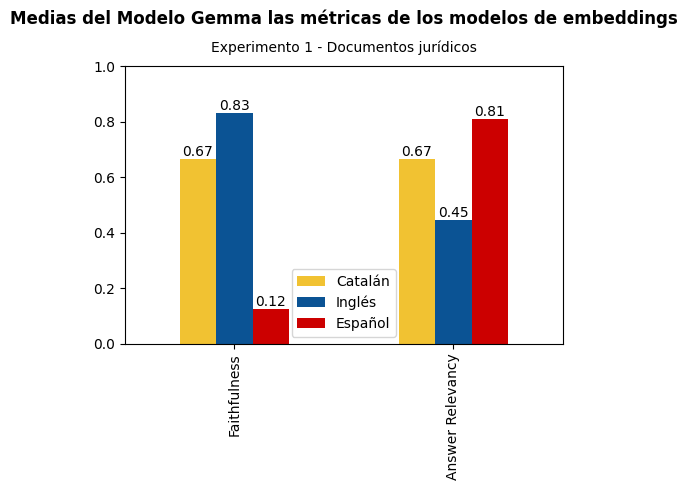

In [10]:
# Definir colores para los gráficos
colors = ["#f1c232", "#0b5394", "#cc0000"]

def add_values_labels(ax):
    """Añadir etiquetas de valor en la parte superior de cada barra."""
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge")

# Gráfico para df_llama3_means
fig, ax = plt.subplots(figsize=(5, 5))
df_llama3_means.plot(kind="bar", color=colors, ax=ax)
plt.title("Medias del Modelo Llama3 las métricas de los modelos de embeddings", loc="center", pad=30, fontweight="bold")
ax.text(0.5, 1.05, "Experimento 1 - Documentos jurídicos", transform=ax.transAxes, fontsize=10, ha="center")
ax.set_ylabel("Media")
ax.set_ylim(0, 1)
add_values_labels(ax)
ax.legend()
plt.tight_layout()
fig.savefig("experimento1_llama3_medias.png")
plt.show()

# Gráfico para df_mistral_means
fig, ax = plt.subplots(figsize=(5, 5))
df_mistral_means.plot(kind="bar", color=colors, ax=ax, legend=False)
plt.title("Medias del Modelo Mistral las métricas de los modelos de embeddings", loc="center", pad=30, fontweight="bold")
ax.text(0.5, 1.05, "Experimento 1 - Documentos jurídicos", transform=ax.transAxes, fontsize=10, ha="center")
ax.set_ylim(0, 1)
add_values_labels(ax)
ax.legend()
plt.tight_layout()
fig.savefig("experimento1_mistral_medias.png")
plt.show()

# Gráfico para df_phi3_means
fig, ax = plt.subplots(figsize=(5, 5))
df_phi3_means.plot(kind="bar", color=colors, ax=ax, legend=False)
plt.title("Medias del Modelo Phi 3 las métricas de los modelos de embeddings", loc="center", pad=30, fontweight="bold")
ax.text(0.5, 1.05, "Experimento 1 - Documentos jurídicos", transform=ax.transAxes, fontsize=10, ha="center")
ax.set_ylim(0, 1)
add_values_labels(ax)
ax.legend(loc="upper left")
plt.tight_layout()
fig.savefig("experimento1_phi3_medias.png")
plt.show()

# Gráfico para df_gemma_means
fig, ax = plt.subplots(figsize=(5, 5))
df_gemma_means.plot(kind="bar", color=colors, ax=ax, legend=False)
plt.title("Medias del Modelo Gemma las métricas de los modelos de embeddings", loc="center", pad=30, fontweight="bold")
ax.text(0.5, 1.05, "Experimento 1 - Documentos jurídicos", transform=ax.transAxes, fontsize=10, ha="center")
ax.set_ylim(0, 1)
add_values_labels(ax)
ax.legend()
plt.tight_layout()
fig.savefig("experimento1_gemma_medias.png")
plt.show()